## Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from diversity import Metacommunity

np.random.seed(42)

## Image sources

- Emojis: Apple standard
- Penguins: http://clipart-library.com/clipart/1750373.htm

## Functions

In [2]:
def species_freq(y, outfile, figsize = (4, 2), linewidth = 3):
    x = list(range(len(y)))
    plt.figure(figsize=figsize)
    plt.bar(x, y, linewidth=linewidth, edgecolor="#000", facecolor="#eee")
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(3) # set_visible(True)
    plt.ylim(0, 31)
    plt.savefig(outfile, transparent=True)
    return

def D1(y):
    tot = sum(y)
    P = [i/tot for i in y]
    return np.exp(-sum([i*np.log(i) for i in P]))

def similarity_matrix(S, outfile, scale=1, cmap="bone_r"):
    S = S**scale                    # if values are too close to 1, scale makes it easier to see differences
    figsize = (len(S), len(S))
    plt.figure(figsize=figsize)
    ax = sns.heatmap(S, cmap=cmap, cbar=False, vmin=0., vmax=1.)
    ax.axhline(y=0, color='k', linewidth=3)
    ax.axvline(x=0, color='k', linewidth=3)
    ax.axhline(y=len(S), color='k', linewidth=3)
    ax.axvline(x=len(S), color='k', linewidth=3)
    _ = plt.tight_layout()
    _ = plt.xticks([])
    _ = plt.yticks([])
    _ = plt.tight_layout()
    _ = plt.savefig(outfile, transparent=True)
    _ = plt.show()
    return

## Figure 1: Illustrates the effect of frequency on diversity

This section goes with Fig. 1 from the manuscript.

The icons are all standard Apple emojis. We generate the species-frequency distributions as follows.

### Community 1a (mostly apples)

1.896549191899248

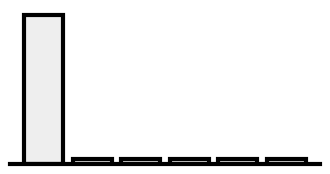

In [3]:
y1 = [30, 1, 1, 1, 1, 1]
species_freq(y1, outfile="fig1_community1_apples_species_freq_distr.pdf"); D1(y1)

### Community 1b (all fruits)

5.98726389483273

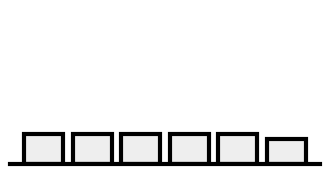

In [4]:
y2 = [6, 6, 6, 6, 6, 5]
species_freq(y2, outfile="fig1_community2_fruits_species_freq_distr.pdf"); D1(y2)

In [5]:
counts_1a = pd.DataFrame(
    {
      "Community 1": [30, 1, 1, 1, 1, 1], 
    },
    index=["apple", "orange", "banana", "pear", "blueberry", "grape"],
)

metacommunity_1a = Metacommunity(counts_1a)

In [6]:
metacommunity_1a.subcommunity_diversity(viewpoint=1, measure='alpha')

array([1.89654919])

In [7]:
metacommunity_1a.to_dataframe(viewpoint=[0, 1, np.inf])

,community,viewpoint,alpha,rho,beta,gamma,normalized_alpha,normalized_rho,normalized_beta,rho_hat,beta_hat
0,metacommunity,0.0,6.000000,1.0,1.0,6.000000,6.000000,1.0,1.0,1.0,1.0
1,Community 1,0.0,6.000000,1.0,1.0,6.000000,6.000000,1.0,1.0,1.0,1.0
2,metacommunity,1.0,1.896549,1.0,1.0,1.896549,1.896549,1.0,1.0,1.0,1.0
3,Community 1,1.0,1.896549,1.0,1.0,1.896549,1.896549,1.0,1.0,1.0,1.0
4,metacommunity,inf,1.166667,1.0,1.0,1.166667,1.166667,1.0,1.0,1.0,1.0
5,Community 1,inf,1.166667,1.0,1.0,1.166667,1.166667,1.0,1.0,1.0,1.0


## Figure 2: Illustrates the effect of similarity on diversity

This figure looks something like this:

<img align=left width=300px src="fig2_thumbnail.png">

As above, the icons are all standard Apple emojis. We generate the heatmaps as follows.

### Community 2a (all birds)

For birds, we just make a random matrix with high similarity.

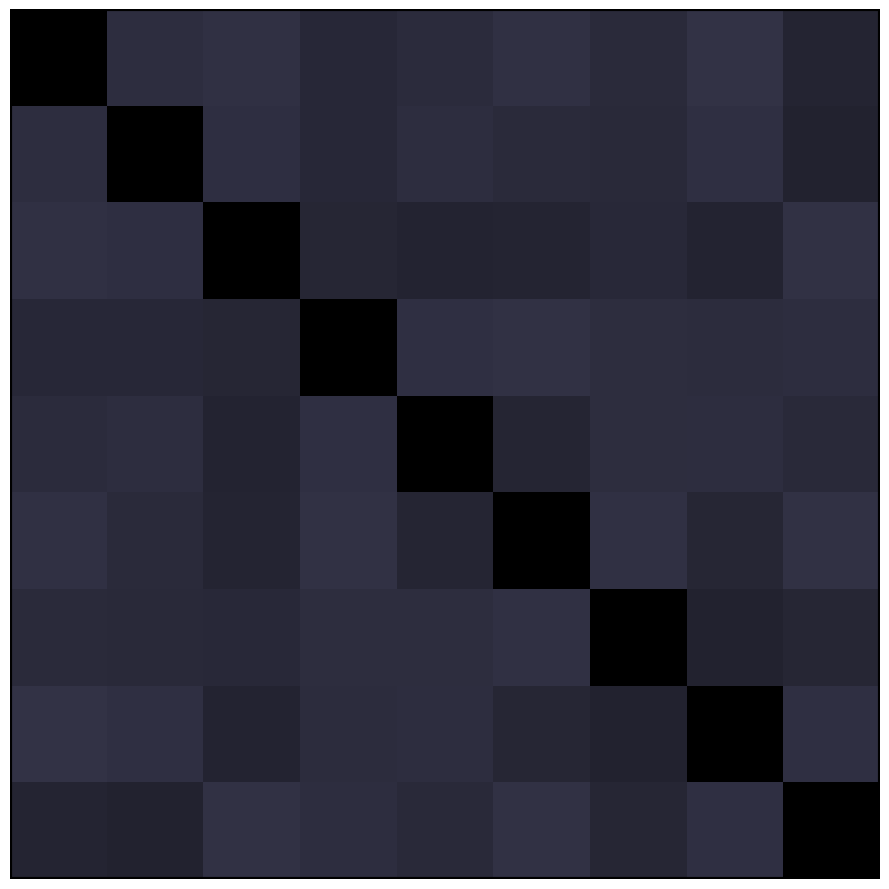

In [9]:
# for D1Z calculation (done separately, though could import and run in this notebook, when code is ready)
labels_2a = ["owl", "swan", "duck", "eagle", "turkey", "dodo", "dove", "fowl", "flamingo"]

# create matrix: random numbers close to 1
low=0.88; high=0.92       # highly similar, but not so similar that one can't see the diagonal
no_species_2a = len(labels_2a)
S_2a = np.identity(n=no_species_2a)
for i in range(no_species_2a):
    for j in range(i+1, no_species_2a):
        S_2a[i][j] = np.random.uniform(low=low, high=high)
S_2a = np.maximum( S_2a, S_2a.transpose() )  # make symmetric

S_2a = pd.DataFrame(
    {
        labels_2a[i]: S_2a[i] for i in range(no_species_2a)
    },
    index=labels_2a,
)

# plot
similarity_matrix(S_2a, scale=2, outfile="fig2_community2a_birds_sim_matrix.pdf")

# save matrix
S_2a.to_csv("S_2a.csv", index=False)

In [10]:
S_2a

,owl,swan,duck,eagle,turkey,dodo,dove,fowl,flamingo
owl,1.000000,0.892185,0.883907,0.907369,0.897606,0.884882,0.899807,0.881376,0.916373
swan,0.892185,1.000000,0.890351,0.906501,0.892468,0.900803,0.901868,0.887394,0.918783
duck,0.883907,0.890351,1.000000,0.911005,0.917580,0.915793,0.903916,0.916875,0.883540
eagle,0.907369,0.906501,0.911005,1.000000,0.887839,0.881809,0.893013,0.895547,0.890854
turkey,0.897606,0.892468,0.917580,0.887839,1.000000,0.913150,0.894270,0.891237,0.901708
dodo,0.884882,0.900803,0.915793,0.881809,0.913150,1.000000,0.885637,0.912088,0.882982
dove,0.899807,0.901868,0.903916,0.893013,0.894270,0.885637,1.000000,0.919475,0.910890
fowl,0.881376,0.887394,0.916875,0.895547,0.891237,0.912088,0.919475,1.000000,0.887949
flamingo,0.916373,0.918783,0.883540,0.890854,0.901708,0.882982,0.910890,0.887949,1.000000


In [11]:
counts_2a = pd.DataFrame({"Community 2a": [1, 1, 1, 1, 1, 1, 1, 1, 1]},
    index=labels_2a)
counts_2a.to_csv("counts_2a.csv", index=False)

In [12]:
counts_2a

,Community 2a
owl,1
swan,1
duck,1
eagle,1
turkey,1
dodo,1
dove,1
fowl,1
flamingo,1


In [13]:
metacommunity_2a = Metacommunity(counts_2a, similarity=S_2a)
metacommunity_2a.subcommunity_diversity(viewpoint=1, measure='alpha')

array([1.09878927])

### Community 2b (various animals)

Here, we care to manually make the similarities more realistic.

The species:

# 🐞🐝🦜🦋🐢🦞🦧🐠🦙

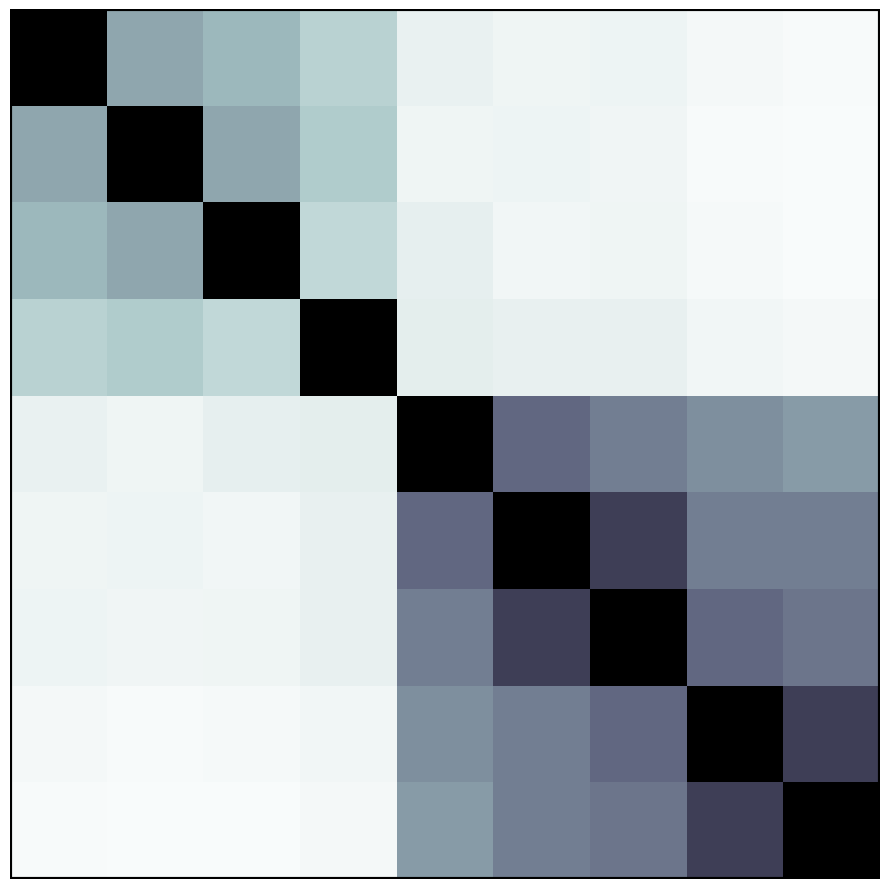

In [15]:
"""
invertebrates (insects -> arthropods) ->
fish -> reptile -> bird -> mammals

🐞🐝🦋🦞🐠🐢🦜🦙🦧
 0 1 2 3 4 5 6 7 8 
"""
# for D1Z calculation (done separately, though could import and run in this notebook, when code is ready)
labels_2b = ("ladybug", "bee", "butterfly", "lobster", "fish", "turtle", "parrot", "llama", "orangutan")

# create matrix: populate as i<j, and then symmetrize (values chosen to be consistent with Community 3's matrix)
no_species_2b = len(labels_2b)
S_2b = np.identity(n=no_species_2b)
S_2b[0][1:9] = (0.60, 0.55, 0.45, 0.25, 0.22, 0.23, 0.18, 0.16) # ladybug
S_2b[1][2:9] = (      0.60, 0.48, 0.22, 0.23, 0.21, 0.16, 0.14) # bee
S_2b[2][3:9] = (            0.42, 0.27, 0.20, 0.22, 0.17, 0.15) # butterfly
S_2b[3][4:9] = (                  0.28, 0.26, 0.26, 0.20, 0.18) # lobster
S_2b[4][5:9] = (                        0.75, 0.70, 0.66, 0.63) # fish
S_2b[5][6:9] = (                              0.85, 0.70, 0.70) # turtle
S_2b[6][7:9] = (                                    0.75, 0.72) # parrot
S_2b[7][8:9] = (                                          0.85) # llama
                                                             # orangutan
S_2b = np.maximum( S_2b, S_2b.transpose() )

S_2b = pd.DataFrame(
    {
        labels_2b[i]: S_2b[i] for i in range(no_species_2b)
    },
    index=labels_2b,
)

# plot
similarity_matrix(S_2b, scale=2, outfile="fig2_community2b_animals_sim_matrix.pdf")

# save matrix
S_2b.to_csv("S_2b.csv", index=False)

In [16]:
S_2b

,ladybug,bee,butterfly,lobster,fish,turtle,parrot,llama,orangutan
ladybug,1.00,0.60,0.55,0.45,0.25,0.22,0.23,0.18,0.16
bee,0.60,1.00,0.60,0.48,0.22,0.23,0.21,0.16,0.14
butterfly,0.55,0.60,1.00,0.42,0.27,0.20,0.22,0.17,0.15
lobster,0.45,0.48,0.42,1.00,0.28,0.26,0.26,0.20,0.18
fish,0.25,0.22,0.27,0.28,1.00,0.75,0.70,0.66,0.63
turtle,0.22,0.23,0.20,0.26,0.75,1.00,0.85,0.70,0.70
parrot,0.23,0.21,0.22,0.26,0.70,0.85,1.00,0.75,0.72
llama,0.18,0.16,0.17,0.20,0.66,0.70,0.75,1.00,0.85
orangutan,0.16,0.14,0.15,0.18,0.63,0.70,0.72,0.85,1.00


In [17]:
counts_2b = pd.DataFrame({"Community 2b": [1, 1, 1, 1, 1, 1, 1, 1, 1]},
    index=labels_2b)
counts_2b.to_csv("counts_2b.csv", index=False)

In [18]:
counts_2b

,Community 2b
ladybug,1
bee,1
butterfly,1
lobster,1
fish,1
turtle,1
parrot,1
llama,1
orangutan,1


In [19]:
metacommunity_2b = Metacommunity(counts_2b, similarity=S_2b)
metacommunity_2b.subcommunity_diversity(viewpoint=1, measure='alpha')

array([2.14151583])

## Figure 3: Illustrates beta diversity

In [20]:
# each phylum its own subcommunity; expect low representativeness
subcommunity_2b_1 = ("🐞", "🐝", "🦋", "🦞")
subcommunity_2b_1 = ("🐠", "🐢", "🦜", "🦙", "🦧")

# each subcommunity has memers from both phyla; expect high representativeness
subcommunity_2b_3 = ("🐞",       "🦋",       "🐠",       "🦜",       "🦧")
subcommunity_2b_4 = (      "🐝",       "🦞",       "🐢",       "🦙",     )

In [21]:
counts_2b_1 = pd.DataFrame({"Subcommunity_2b_1": [1, 1, 1, 1, 0, 0, 0, 0, 0],
                         "Subcommunity_2b_2": [0, 0, 0, 0, 1, 1, 1, 1, 1]}, index=labels_2b)
counts_2b_1.to_csv("counts_2b_1.csv", index=False)

In [22]:
counts_2b_1

,Subcommunity_2b_1,Subcommunity_2b_2
ladybug,1,0
bee,1,0
butterfly,1,0
lobster,1,0
fish,0,1
turtle,0,1
parrot,0,1
llama,0,1
orangutan,0,1


In [23]:
metacommunity_2b_1 = Metacommunity(counts_2b_1, similarity=S_2b)
metacommunity_2b_1.subcommunity_diversity(viewpoint=0, measure='rho_hat')

array([0.41333318, 0.21398288])

In [24]:
metacommunity_2b_1.subcommunity_diversity(viewpoint=0, measure='alpha')

array([3.53787004, 2.29512853])

In [25]:
counts_2b_2 = pd.DataFrame({"Subcommunity_3": [1, 0, 1, 0, 1, 0, 1, 0, 1],
                         "Subcommunity_4": [0, 1, 0, 1, 0, 1, 0, 1, 0]}, index=labels_2b)
counts_2b_2.to_csv("counts_2b_2.csv", index=False)

In [26]:
counts_2b_2

,Subcommunity_3,Subcommunity_4
ladybug,1,0
bee,0,1
butterfly,1,0
lobster,0,1
fish,1,0
turtle,0,1
parrot,1,0
llama,0,1
orangutan,1,0


In [27]:
metacommunity_2b_2 = Metacommunity(counts_2b_2, similarity=S_2b)
metacommunity_2b_2.subcommunity_diversity(viewpoint=0, measure='rho_hat')

array([0.67824819, 1.06877778])